<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/3_2_Fixed_point_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Variable Equations

Based in Diego Restrepo y Sebastian Bustamante notebooks. https://github.com/restrepo/ComputationalMethods

In [9]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML

# Fixed-point Iteration

Although in many cases the use of Bisection is more than enough, there are some pathological situations where the use of more advanced methods is required.
One of the advantages featured by this method is one does not have to give an interval where the solution is within, instead, from a seed the algorithm will converge towards the required solution.

## Steps FP

1. Take your function $f(x)$ and rewrite it like

    $g(x) = x - f(x)$

2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $p_1 = g(p_0)$

4. If the stop condition is not satisfied, then repeat step 3 with $p_n = g(p_{n-1})$.
5. The End!

In [2]:
#Fixed Point strategy
def FixedPoint( f, pini, Nmax):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    #Iterations
    for n in range(Nmax+3):
        pi.append( g(pi[n]) )

    pi = np.array( pi )
    #print(pi)

    return pi[-1]

In [4]:
#Defining Fixed-point iteration function
def FixedPoint_Animation( f, pini, Nmax, xmin, xmax ):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    px = [pini,pini,]
    py = [0,]
    #Iterations
    for n in range(Nmax+3):
        pi.append( g(pi[n]) )
        px.append( g(pi[n]) )
        px.append( g(pi[n]) )
        py.append( g(pi[n]) )
        py.append( g(pi[n]) )#Warning

    py.append( g(pi[n+1]) )
    pi = np.array( pi )
    px = np.array( px )
    py = np.array( py )

    print("Result:", pi[-1])

    #Array X-axis
    X = np.linspace(xmin,xmax,100)

    #Initializing Figure
    fig = plt.figure( figsize=(4,4) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    fixedpoint, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function g
    ax.plot( X, g(X), color="green", linewidth = 2 )
    #Identity funcion
    ax.plot( X, X, color="blue", linewidth = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (xmin, xmax) )
    ax.set_xlabel( "X axis are the pi" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )

    def init():
        fixedpoint.set_data([], [])
        return fixedpoint,

    def animate(i):
        #Setting new data
        fixedpoint.set_data( px[:2*i], py[:2*i] )
        ax.set_title( "Fixed-Point. Iteration %d"%i )
        return fixedpoint,

    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)
    #original python2

## Example 3

Find the roots of the next functions:

$$f_1(x) = \frac{x^2-1}{3}$$

and

$$f_2(x) = x-\cos x$$

using Fixed-Point iteration.

In [5]:
def f1(x):
    return (x**2-1)/3.0

In [6]:
FixedPoint( f1, pini = 0.1, Nmax = 5)

np.float64(0.9993554165659998)

In [7]:
#FixedPoint( f1, pini = 0.1, Nmax = 25)

Result: 0.9999999999998149


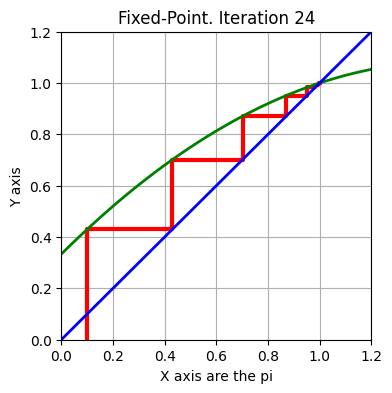

In [8]:
ani = FixedPoint_Animation( f1, pini = 0.1, Nmax = 25, xmin = 0, xmax = 1.2 )

HTML(ani.to_jshtml())  # Devuelve la animación en formato html

Result: 0.7387845105929659


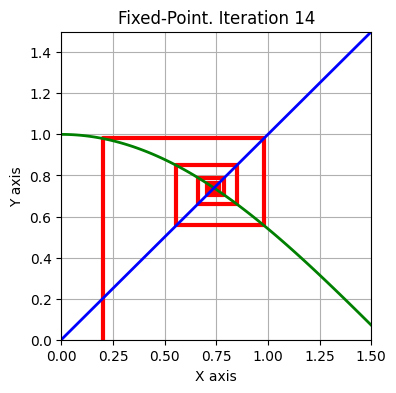

In [ ]:
def f2(x):
    return x-np.cos(x)

ani = FixedPoint_Animation( f2, pini = 0.2, Nmax = 15, xmin = 0, xmax = 1.5 )

HTML(ani.to_jshtml())  # Devuelve la animación en formato html

## Stop conditions FP

The stop conditions are the same than Bisection:

* A fixed distance between the last two steps (absolute convergence):

    \begin{equation}
    |p_i - p_{i-1}|<\epsilon
    \end{equation}

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max} $ , stop!

## Example 4

**There is a type of functions whose roots coincides with a local or global minima or maxima**. This condition implies the function does not cross the x-axis at the root **and the problem cannot be solved by using Bisection** as the criterion of different signs cannot be satisfied. Fixed-point iteration is a more feasible alternative when solving these problems.

As an example, here we shall solve the roots of the function

$f(x) = x^2\cos(2x)$

For this, we plot the function first:

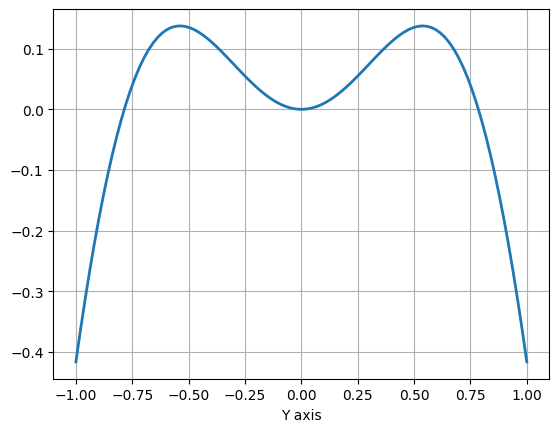

In [ ]:
def f(x):
    return x**2*np.cos(2*x)

X = np.linspace(-1,1,100)
plt.plot( X, f(X), lw=2 )
plt.xlabel("X axis")
plt.xlabel("Y axis")
plt.grid(True)

It is clear there are three root within the plotted interval, i.e. $x_0 = -\pi/4$, $x_1 = 0$ and $x_2 = \pi/4$. Using bisection for the first and third roots we obtain:

In [ ]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print("Value for %d iterations:"%n,pi)
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

In [ ]:
print(np.pi/4.)

0.7853981633974483


In [ ]:
#Root 0
print("Root x_0:", Bisection( f, a=-1, b=-0.5, Nmax=56 ))
#Root 2
print("Root x_2:", Bisection( f, a=0.5, b=1, Nmax=56 ))

Root x_0: -0.7853981633974483
Root x_2: 0.7853981633974483


However, when applying bisection to the middle root, we obtain:

In [ ]:
#Root 1
print("Root x_1:", Bisection( f, a=-0.5, b=0.5, Nmax=56 ))
print("Root x_1:", Bisection( f, a=-0.5, b=1.0, Nmax=56 ))

Error, f(a) and f(b) should have opposite signs
Root x_1: False
Root x_1: 0.7853981633974483


Now, applying Fixed-point iteration:

In [ ]:
print(FixedPoint( f, pini = 0.4, Nmax = 20))
print(FixedPoint( f, pini = 0.4, Nmax = 40))
print(FixedPoint( f, pini = 0.4, Nmax = 1000))

0.037015696780238916
0.02102767393815205
0.0009895284414579218


Result: -0.7853981633974483


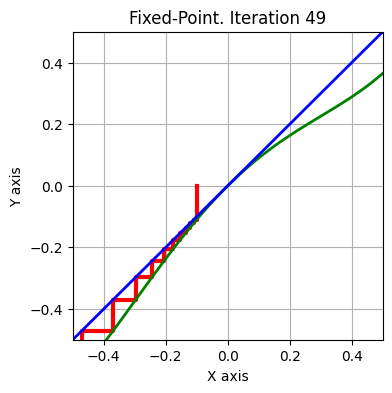

In [ ]:
ani = FixedPoint_Animation( f, pini = -0.1, Nmax = 50, xmin = -0.5, xmax = 0.5 )

HTML(ani.to_jshtml())  # Devuelve la animación en formato html

## ACTIVITY: Lab4.1 Fixed Point

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius.

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

<font color='red'>    
In an IPython notebook, solve the previous problem and find the radius of **Gliese 832c** using your own version of the Fixed-point iteration algorithm.
</font>

- - -